In [130]:
%reset -f 

In [131]:
from sklearn import datasets
import seaborn as sns

In [132]:
# sns.get_dataset_names()
iris = sns.load_dataset('iris')

In [133]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [134]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

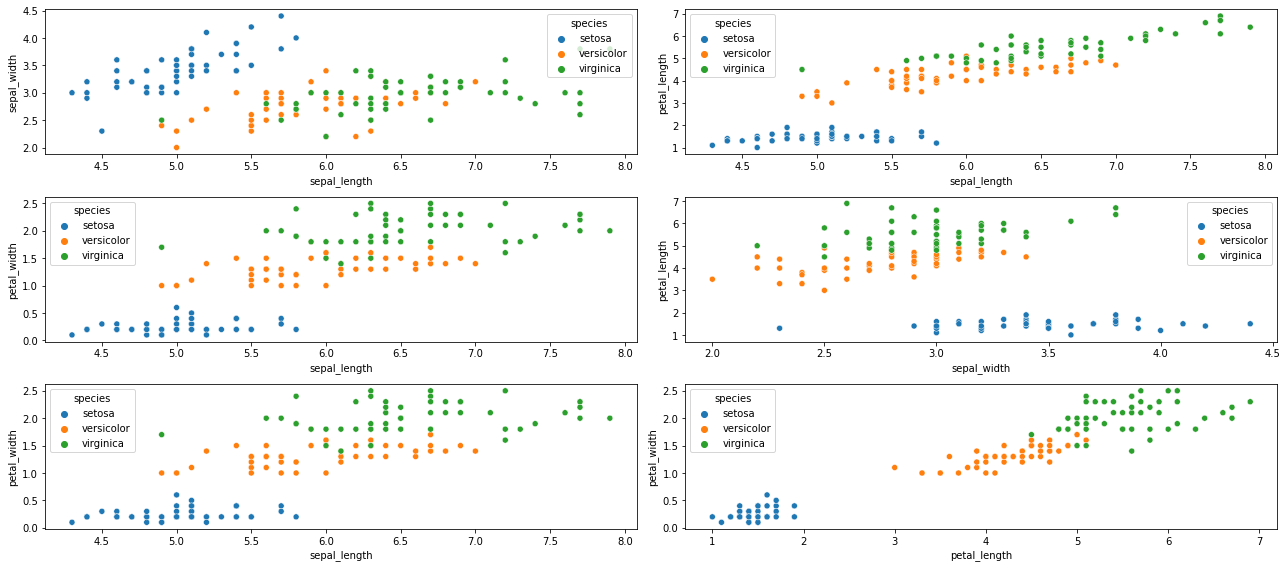

In [135]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(3,2,figsize=(18,8))
sns.scatterplot(x='sepal_length',y='sepal_width',data=iris,hue='species',ax=ax[0][0])
sns.scatterplot(x='sepal_length',y='petal_length',data=iris,hue='species',ax=ax[0][1])
sns.scatterplot(x='sepal_length',y='petal_width',data=iris,hue='species',ax=ax[1][0])
sns.scatterplot(x='sepal_width',y='petal_length',data=iris,hue='species',ax=ax[1][1])
sns.scatterplot(x='sepal_length',y='petal_width',data=iris,hue='species',ax=ax[2][0])
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species',ax=ax[2][1])
plt.tight_layout()

In [136]:
# only setosa or versicolor
def reset_data():
    iris = sns.load_dataset('iris')
    setosa_or_versicolor = (iris.species == "setosa") | (iris.species == "versicolor")
    iris = iris[setosa_or_versicolor][["petal_length","petal_width","species"]].copy()
    y = iris.species.copy()
    X = iris.drop(["species"],axis=1)
    return iris,X,y

In [137]:
iris,X,y=reset_data()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

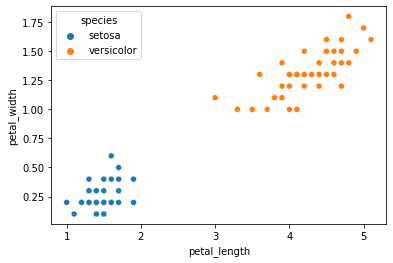

In [138]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue="species")

In [143]:
# SVM Classifier model
import numpy as np 
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(kernel='linear')

In [144]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0] / w[1] * x0 - b / w[1]

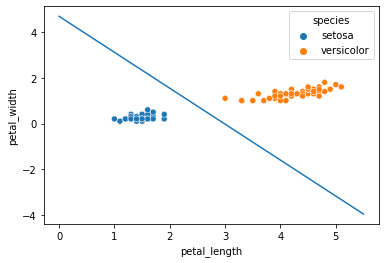

In [145]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue="species")
plt.plot(x0,decision_boundary)

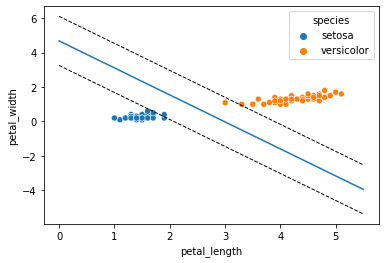

In [146]:
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue="species")
plt.plot(x0,decision_boundary)
plt.plot(x0,gutter_up,"k--", linewidth=1)
plt.plot(x0,gutter_down,"k--", linewidth=1)

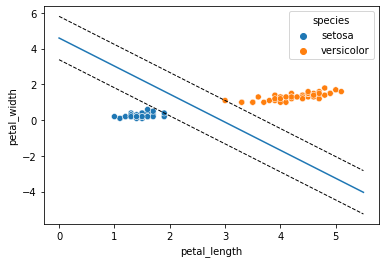

In [147]:
# SVM Classifier model
import numpy as np 
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear",C=float("inf"))
svm_clf.fit(X, y)

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0] / w[1] * x0 - b / w[1]

margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue="species")
plt.plot(x0,decision_boundary)
plt.plot(x0,gutter_up,"k--", linewidth=1)
plt.plot(x0,gutter_down,"k--", linewidth=1)

In [148]:
iris,X,y = reset_data()
outlier = {"petal_length":1.9,"petal_width":-.1,"species":"versicolor"}
iris = iris.append(outlier,ignore_index=True)

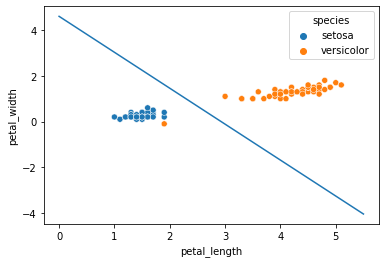

In [149]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue="species")
plt.plot(x0,decision_boundary)

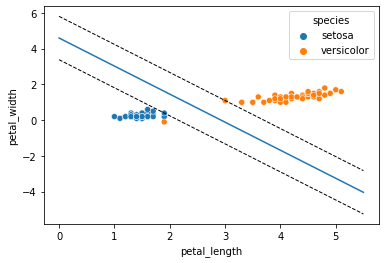

In [150]:
# SVM Classifier model
import numpy as np 
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear",C=float("inf"))
svm_clf.fit(X, y)

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0] / w[1] * x0 - b / w[1]

margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue="species")
plt.plot(x0,decision_boundary)
plt.plot(x0,gutter_up,"k--", linewidth=1)
plt.plot(x0,gutter_down,"k--", linewidth=1)